#### Plots and use case :
###### Histplot(Histogram) for numeric data: to understand it's distribution
###### coountplot(frequency plot or bar chat ): to understand the distribution of categorial data
###### Scatter Plot : to understand thr distribution of two numeric variables together 
###### Distplt/displot : to understand the distribution of numerical variable
###### Pairplot : to check the pair-wise distribution between all pairs of numeric variables
###### Heatmap/correlation : to see the correlation between all pairs of numeric variables 
###### Line chart : to understand the trained of a numeric feature w.r.t. some another categorical variable (datetime )
###### Pie chart : to compare percentage and see the outstandong category is categorial variable (used for numeric summary w.r.t. categories )
###### Bar Chart : To undertsnd few top/bottom categories when arranged in sorted order 

## Exploratory Data Analysis (EDA) with Pandas:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.describe(include="all")
# df.info()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.08900,69.169000,68.054000
std,NaN,NaN,NaN,NaN,NaN,15.16308,14.600192,15.195657
min,NaN,NaN,NaN,NaN,NaN,0.00000,17.000000,10.000000
25%,NaN,NaN,NaN,NaN,NaN,57.00000,59.000000,57.750000
50%,NaN,NaN,NaN,NaN,NaN,66.00000,70.000000,69.000000
75%,NaN,NaN,NaN,NaN,NaN,77.00000,79.000000,79.000000


In [6]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [7]:
for col in df.columns:
    if df[col].dtype == 'O': # object data type
        print(f"===========> Column: {col}")
        print(df[col].unique())

===========> Column: gender
['female' 'male']
===========> Column: race/ethnicity
['group B' 'group C' 'group A' 'group D' 'group E']
===========> Column: parental level of education
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
===========> Column: lunch
['standard' 'free/reduced']
===========> Column: test preparation course
['none' 'completed']


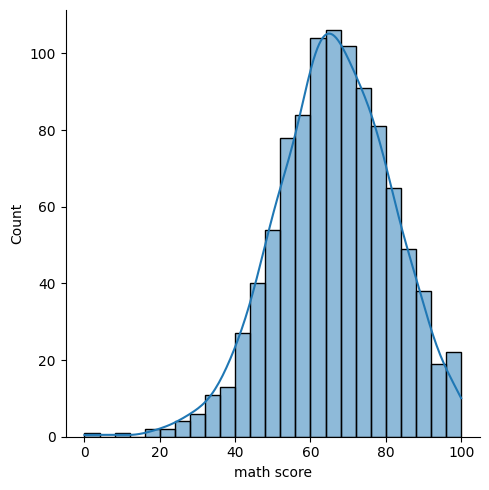

In [10]:
sns.displot(data=df, x="math score", kde=True)
plt.show()

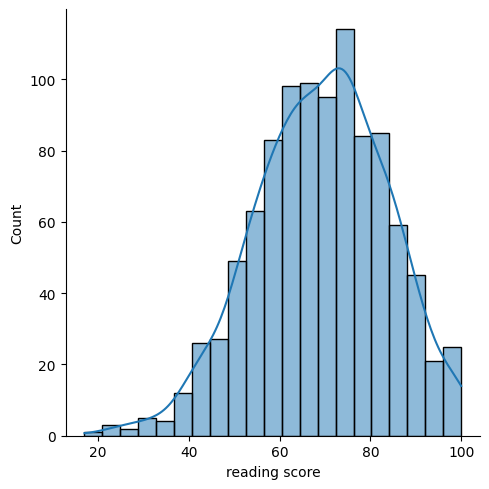

In [11]:
sns.displot(data=df, x="reading score", kde=True)
plt.show()

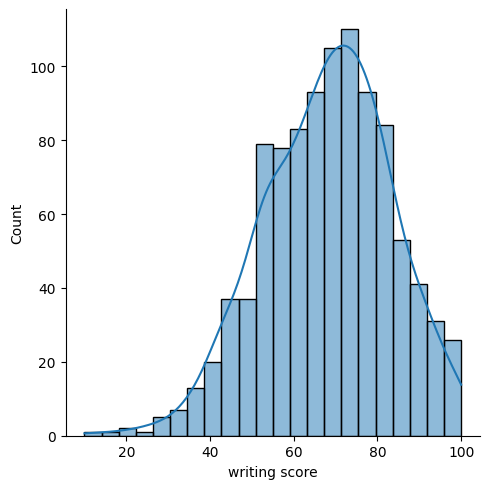

In [12]:
sns.displot(data=df, x="writing score", kde=True)
plt.show()

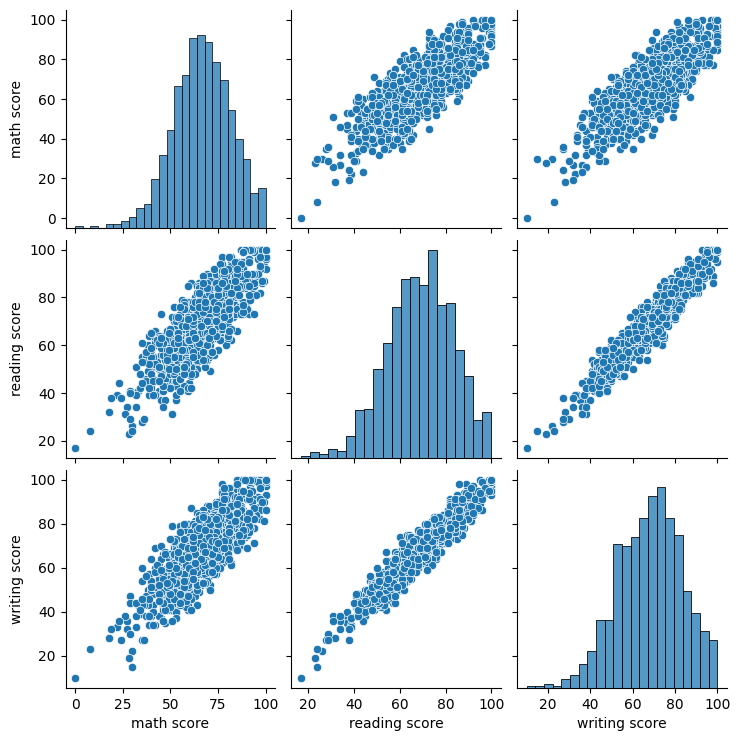

In [16]:
sns.pairplot(data=df)
plt.show()

In [17]:
corr = df.corr(numeric_only=True)
corr

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


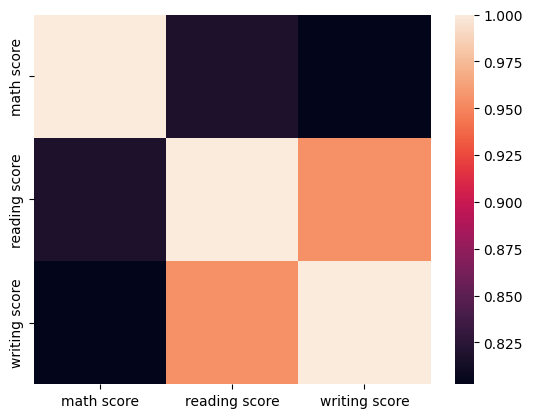

In [18]:
sns.heatmap(data=corr)
plt.show()

## Convert categorical columns to numeric:

### One Hot Encoding (OHE):
One Hot Encoding is a method for converting categorical variables into a binary format. It creates new binary columns (0s and 1s) for each category in the original variable. Each category in the original column is represented as a separate column, where a value of 1 indicates the presence of that category, and 0 indicates its absence

In [19]:
df["gender"]

df_numeric = pd.get_dummies(data=df, columns=["gender", "lunch", "race/ethnicity"])
df_numeric.head()

,parental level of education,test preparation course,math score,reading score,writing score,gender_female,gender_male,lunch_free/reduced,lunch_standard,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E
0,bachelor's degree,none,72,72,74,True,False,False,True,False,True,False,False,False
1,some college,completed,69,90,88,True,False,False,True,False,False,True,False,False
2,master's degree,none,90,95,93,True,False,False,True,False,True,False,False,False
3,associate's degree,none,47,57,44,False,True,True,False,True,False,False,False,False
4,some college,none,76,78,75,False,True,False,True,False,False,True,False,False


In [20]:
# get categorical column names
cat_columns = [col for col in df.columns if df[col].dtype=='O']
cat_columns

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [21]:
# extract categorical columns from the dataframe
cat_df = df.select_dtypes(include=["object"])
cat_df

,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
2,female,group B,master's degree,standard,none
3,male,group A,associate's degree,free/reduced,none
4,male,group C,some college,standard,none
...,...,...,...,...,...
995,female,group E,master's degree,standard,completed
996,male,group C,high school,free/reduced,none
997,female,group C,high school,free/reduced,completed
998,female,group D,some college,standard,completed


In [22]:
df_numeric = pd.get_dummies(data=df, columns=cat_columns)
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                                          Non-Null Count  Dtype
---  ------                                          --------------  -----
 0   math score                                      1000 non-null   int64
 1   reading score                                   1000 non-null   int64
 2   writing score                                   1000 non-null   int64
 3   gender_female                                   1000 non-null   bool 
 4   gender_male                                     1000 non-null   bool 
 5   race/ethnicity_group A                          1000 non-null   bool 
 6   race/ethnicity_group B                          1000 non-null   bool 
 7   race/ethnicity_group C                          1000 non-null   bool 
 8   race/ethnicity_group D                          1000 non-null   bool 
 9   race/ethnicity_group E                          1000 non-null   

### Converting data type (boolean to int):

In [30]:
# when all the remaining columns are in int form
df_numeric = df_numeric.astype(int)
df_numeric.head()

,math score,reading score,writing score,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,72,72,74,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
1,69,90,88,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0
2,90,95,93,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
3,47,57,44,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4,76,78,75,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1


In [31]:
# when the remaining columns may contain int or float data:
bool_column_names = df_numeric.select_dtypes(include=["bool"]).columns
df_numeric[bool_column_names] = df_numeric[bool_column_names].astype(int)
df_numeric.head()

,math score,reading score,writing score,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,72,72,74,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
1,69,90,88,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0
2,90,95,93,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
3,47,57,44,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4,76,78,75,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1


### Lable encoding 
##### Label encoding is a technique that is used to convert categorical columns into numerical ones. ( if categorial data has hierarchial sense )

For Lable Encoding ==> Apply, Map, applymap 


In [23]:
df = pd.read_csv("StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [24]:
# extract categorical columns from the dataframe
cat_columns = df.select_dtypes(include=["object"]).columns
cat_columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')

In [37]:
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,race_numeric
0,female,group B,bachelor's degree,standard,none,72,72,74,2
1,female,group C,some college,standard,completed,69,90,88,3
2,female,group B,master's degree,standard,none,90,95,93,2
3,male,group A,associate's degree,free/reduced,none,47,57,44,1
4,male,group C,some college,standard,none,76,78,75,3


In [25]:
df["race/ethnicity"] = pd.factorize(df["race/ethnicity"])[0]
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,0,bachelor's degree,standard,none,72,72,74
1,female,1,some college,standard,completed,69,90,88
2,female,0,master's degree,standard,none,90,95,93
3,male,2,associate's degree,free/reduced,none,47,57,44
4,male,1,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,4,master's degree,standard,completed,88,99,95
996,male,1,high school,free/reduced,none,62,55,55
997,female,1,high school,free/reduced,completed,59,71,65
998,female,3,some college,standard,completed,68,78,77


#### using map to assign custom labels:

In [26]:
df = pd.read_csv("StudentsPerformance.csv")
# df["race/ethnicity"].unique()
labels = {'group A':1, 'group B':2, 'group C':3, 'group D':4, 'group E':5}
df["race_numeric"] = df["race/ethnicity"].map(labels)
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,race_numeric
0,female,group B,bachelor's degree,standard,none,72,72,74,2
1,female,group C,some college,standard,completed,69,90,88,3
2,female,group B,master's degree,standard,none,90,95,93,2
3,male,group A,associate's degree,free/reduced,none,47,57,44,1
4,male,group C,some college,standard,none,76,78,75,3
5,female,group B,associate's degree,standard,none,71,83,78,2
6,female,group B,some college,standard,completed,88,95,92,2
7,male,group B,some college,free/reduced,none,40,43,39,2
8,male,group D,high school,free/reduced,completed,64,64,67,4
9,female,group B,high school,free/reduced,none,38,60,50,2


In [32]:
print(dir (pd))

['ArrowDtype', 'BooleanDtype', 'Categorical', 'CategoricalDtype', 'CategoricalIndex', 'DataFrame', 'DateOffset', 'DatetimeIndex', 'DatetimeTZDtype', 'ExcelFile', 'ExcelWriter', 'Flags', 'Float32Dtype', 'Float64Dtype', 'Grouper', 'HDFStore', 'Index', 'IndexSlice', 'Int16Dtype', 'Int32Dtype', 'Int64Dtype', 'Int8Dtype', 'Interval', 'IntervalDtype', 'IntervalIndex', 'MultiIndex', 'NA', 'NaT', 'NamedAgg', 'Period', 'PeriodDtype', 'PeriodIndex', 'RangeIndex', 'Series', 'SparseDtype', 'StringDtype', 'Timedelta', 'TimedeltaIndex', 'Timestamp', 'UInt16Dtype', 'UInt32Dtype', 'UInt64Dtype', 'UInt8Dtype', '__all__', '__builtins__', '__cached__', '__doc__', '__docformat__', '__file__', '__git_version__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', '_built_with_meson', '_config', '_is_numpy_dev', '_libs', '_pandas_datetime_CAPI', '_pandas_parser_CAPI', '_testing', '_typing', '_version_meson', 'annotations', 'api', 'array', 'arrays', 'bdate_range', 'compat', 'conca

In [33]:
print(dir (sns))

['FacetGrid', 'JointGrid', 'PairGrid', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', '_base', '_compat', '_core', '_docstrings', '_orig_rc_params', '_statistics', '_stats', 'algorithms', 'axes_style', 'axisgrid', 'barplot', 'blend_palette', 'boxenplot', 'boxplot', 'categorical', 'catplot', 'choose_colorbrewer_palette', 'choose_cubehelix_palette', 'choose_dark_palette', 'choose_diverging_palette', 'choose_light_palette', 'clustermap', 'cm', 'color_palette', 'colors', 'countplot', 'crayon_palette', 'crayons', 'cubehelix_palette', 'dark_palette', 'desaturate', 'despine', 'displot', 'distplot', 'distributions', 'diverging_palette', 'dogplot', 'ecdfplot', 'external', 'get_data_home', 'get_dataset_names', 'heatmap', 'histplot', 'hls_palette', 'husl_palette', 'jointplot', 'kdeplot', 'light_palette', 'lineplot', 'lmplot', 'load_dataset', 'matrix', 'miscplot', 'move_legend', 'mpl', 'mpl_palette', 'pairplot', 

In [ ]:
print(dir (pd))